In [1]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from PIL import Image
import PIL
import os, glob, sys, shutil
#import vissl
import tensorboard
#import apex
import torch
#from vissl.utils.io import load_file
import xarray
import math
import cv2
import scipy
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#from vissl.utils.io import save_file
from matplotlib.image import NonUniformImage
from matplotlib import colors
from scipy.stats import norm
from matplotlib import cm as cm
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import logging
#from iopath.common.file_io import g_pathmgr, file_lock
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.manifold import TSNE

### discrete model

In [16]:
common_path = '/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/features/'

filename1 = 'rank0_chunk0_train_heads_inds.npy' 
filename2 = 'rank0_chunk0_train_heads_targets.npy'
filename3 = 'rank0_chunk0_train_heads_features.npy'

data1 = np.load(common_path+filename1)
#data2 = np.load(common_path+filename2)
data3 = np.load(common_path+filename3)

data = data3

#data = np.reshape(data3,(532202,128))

#tsne = TSNE(n_components=2, random_state=5).fit_transform(data)
#np.save('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/tsne_germany_800ep.npy', tsne)
tsne = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/features/tsnegermany_pca_cosine_800ep.npy')

# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

tsne.shape

(664332, 2)

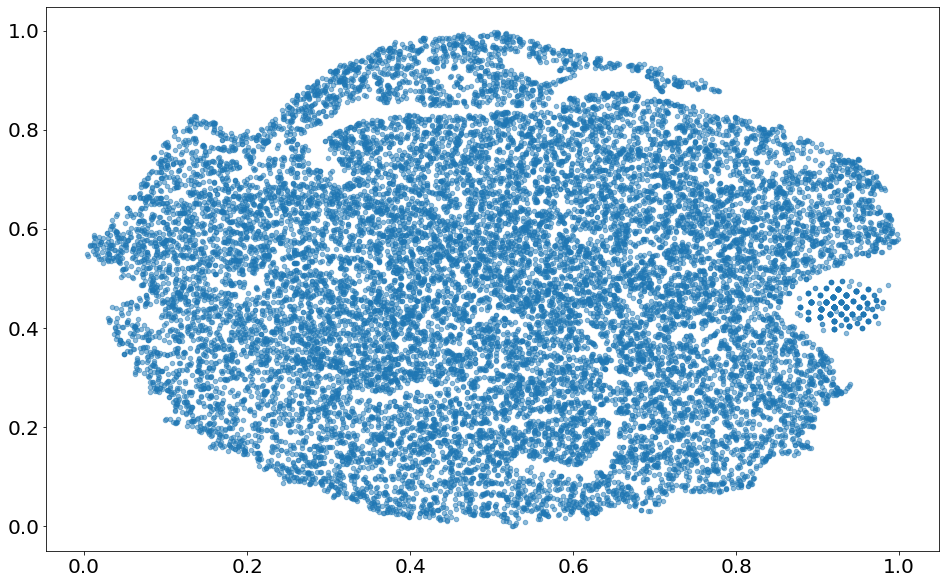

In [17]:
df_subset = pd.DataFrame()
df_subset['tsne-dcv22d-one'] = tx
df_subset['tsne-dcv22d-two'] = ty

files = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/samples_k10_800ep.npy')
loc=[]
for i in range(len(df_subset)):
    file = str(files[i])
    file = file[2:len(file)-7]
    loc.append(file)

df_subset['location'] = ""
df_subset['location'] = loc

df_subset1 = df_subset.sample(n = 20000)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

plt.scatter(df_subset1['tsne-dcv22d-one'],df_subset1['tsne-dcv22d-two'],alpha=0.5,s=20)
ax.tick_params(axis='both', which='major', labelsize=20)

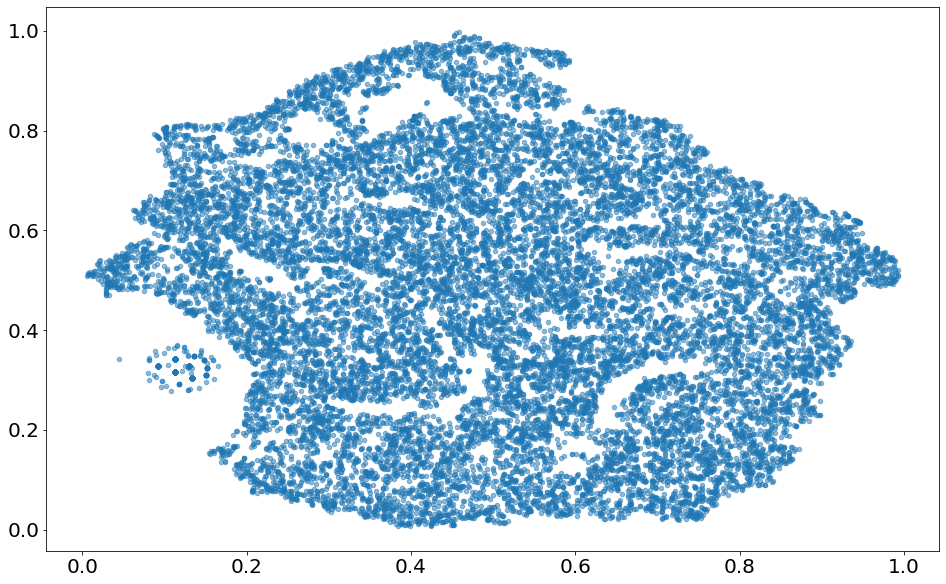

In [6]:
tsne = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/features/tsnegermany_pca_cosine_500annealing50_800ep.npy')
tx = tsne[:, 0]
ty = tsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
df_subset = pd.DataFrame()
df_subset['tsne-dcv22d-one'] = tx
df_subset['tsne-dcv22d-two'] = ty
df_subset1 = df_subset.sample(n = 20000)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

plt.scatter(df_subset1['tsne-dcv22d-one'],df_subset1['tsne-dcv22d-two'],alpha=0.5,s=20)
ax.tick_params(axis='both', which='major', labelsize=20)

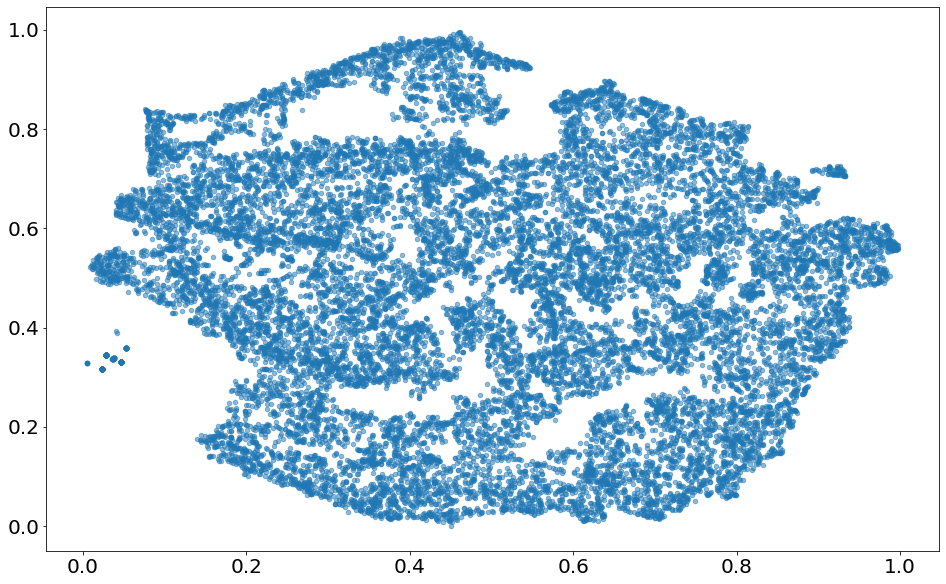

In [7]:
tsne = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/features/tsnegermany_pca_cosine_500multiscale50_800ep.npy')
tx = tsne[:, 0]
ty = tsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
df_subset = pd.DataFrame()
df_subset['tsne-dcv22d-one'] = tx
df_subset['tsne-dcv22d-two'] = ty
df_subset1 = df_subset.sample(n = 20000)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

plt.scatter(df_subset1['tsne-dcv22d-one'],df_subset1['tsne-dcv22d-two'],alpha=0.5,s=20)
ax.tick_params(axis='both', which='major', labelsize=20)

In [18]:
assignments = torch.load("/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/assignments_800ep.pt",map_location='cpu')
df = pd.DataFrame()
df['label'] = ""
df['index'] = data1
df = df.set_index('index')
for index in range(len(data1)):
    df.loc[index] = assignments[0].cpu()[index]

df_subset['y'] = df['label']
df_subset['label'] = df_subset['y'].apply(lambda i: str(i))

files = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/samples_k10_800ep.npy')
loc=[]
for i in range(len(assignments[0])):
    file = str(files[i])
    file = file[2:len(file)-7]
    loc.append(file)

df_subset['location'] = ""
df_subset['location'] = loc

labels = df_subset['label']

df_subset1 = df_subset[df_subset.y != -100]

len(df_subset), len(df_subset1)

(664332, 663600)

In [19]:
df_subset.to_csv('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/tsne_k7_g128.csv', index=False)
df_subset = pd.read_csv('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/tsne_k7_g128.csv')
df_subset1 = df_subset[df_subset.y != -100]
len(df_subset), len(df_subset1)

(664332, 663600)

In [20]:
df_main=df_subset
print(len(df_main.loc[df_main['label']==0]),len(df_main.loc[df_main['label']==1]),
     len(df_main.loc[df_main['label']==2]),len(df_main.loc[df_main['label']==3]),
     len(df_main.loc[df_main['label']==4]),len(df_main.loc[df_main['label']==5]),
     len(df_main.loc[df_main['label']==6]),len(df_main.loc[df_main['label']==7]),
     len(df_main.loc[df_main['label']==8]),len(df_main.loc[df_main['label']==9]),
      len(df_main.loc[df_main['label']==-100]))

96972 94580 58061 63980 80841 174862 94304 0 0 0 732


In [21]:
colors_per_class1 = {
    '0' : [248,240,202 ], 
    '1' : [192, 192, 192],
    '2' : [3, 183, 255],
    '3' : [230, 202, 142],
    '4' : [188, 158, 33],
    '5' : [71, 48, 2],
    '6' : [0, 133, 251],
    '7' : [151, 31, 52],
    #'8' : [0, 0, 0],
    #'9' : [100, 100, 255],
}
'''
fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111)

for label in colors_per_class1:
    
    indices = [i for i, l in enumerate(labels) if l == label]
    current_tx = df_subset1.loc[indices]['tsne-dcv22d-one']    # indices are taking care of the correspondence
    current_ty = df_subset1.loc[indices]['tsne-dcv22d-two']
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(current_tx, current_ty, c=color, label=label)
ax.legend(loc='best')
plt.legend(prop={'size': 25})
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()
'''

def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape

    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset

    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # knowing the image center, compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)

    br_x = tl_x + image_width
    br_y = tl_y + image_height

    return tl_x, tl_y, br_x, br_y

def scale_image(image, max_image_size):
    image_height, image_width, _ = image.shape

    scale = max(1, image_width / max_image_size, image_height / max_image_size)
    image_width = int(image_width / scale)
    image_height = int(image_height / scale)

    image = cv2.resize(image, (image_width, image_height))
    return image

def draw_rectangle_by_class(image, label):
    image_height, image_width, _ = image.shape

    # get the color corresponding to image class
    color =  colors_per_class1[label]
    image = cv2.rectangle(image, (0, 0), (image_width - 1, image_height - 1), color=color, thickness=4)

    return image

In [22]:
plot_size=1000
max_image_size=80

offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset

tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)
df_subset2 = df_subset1.sample(n = 20000)

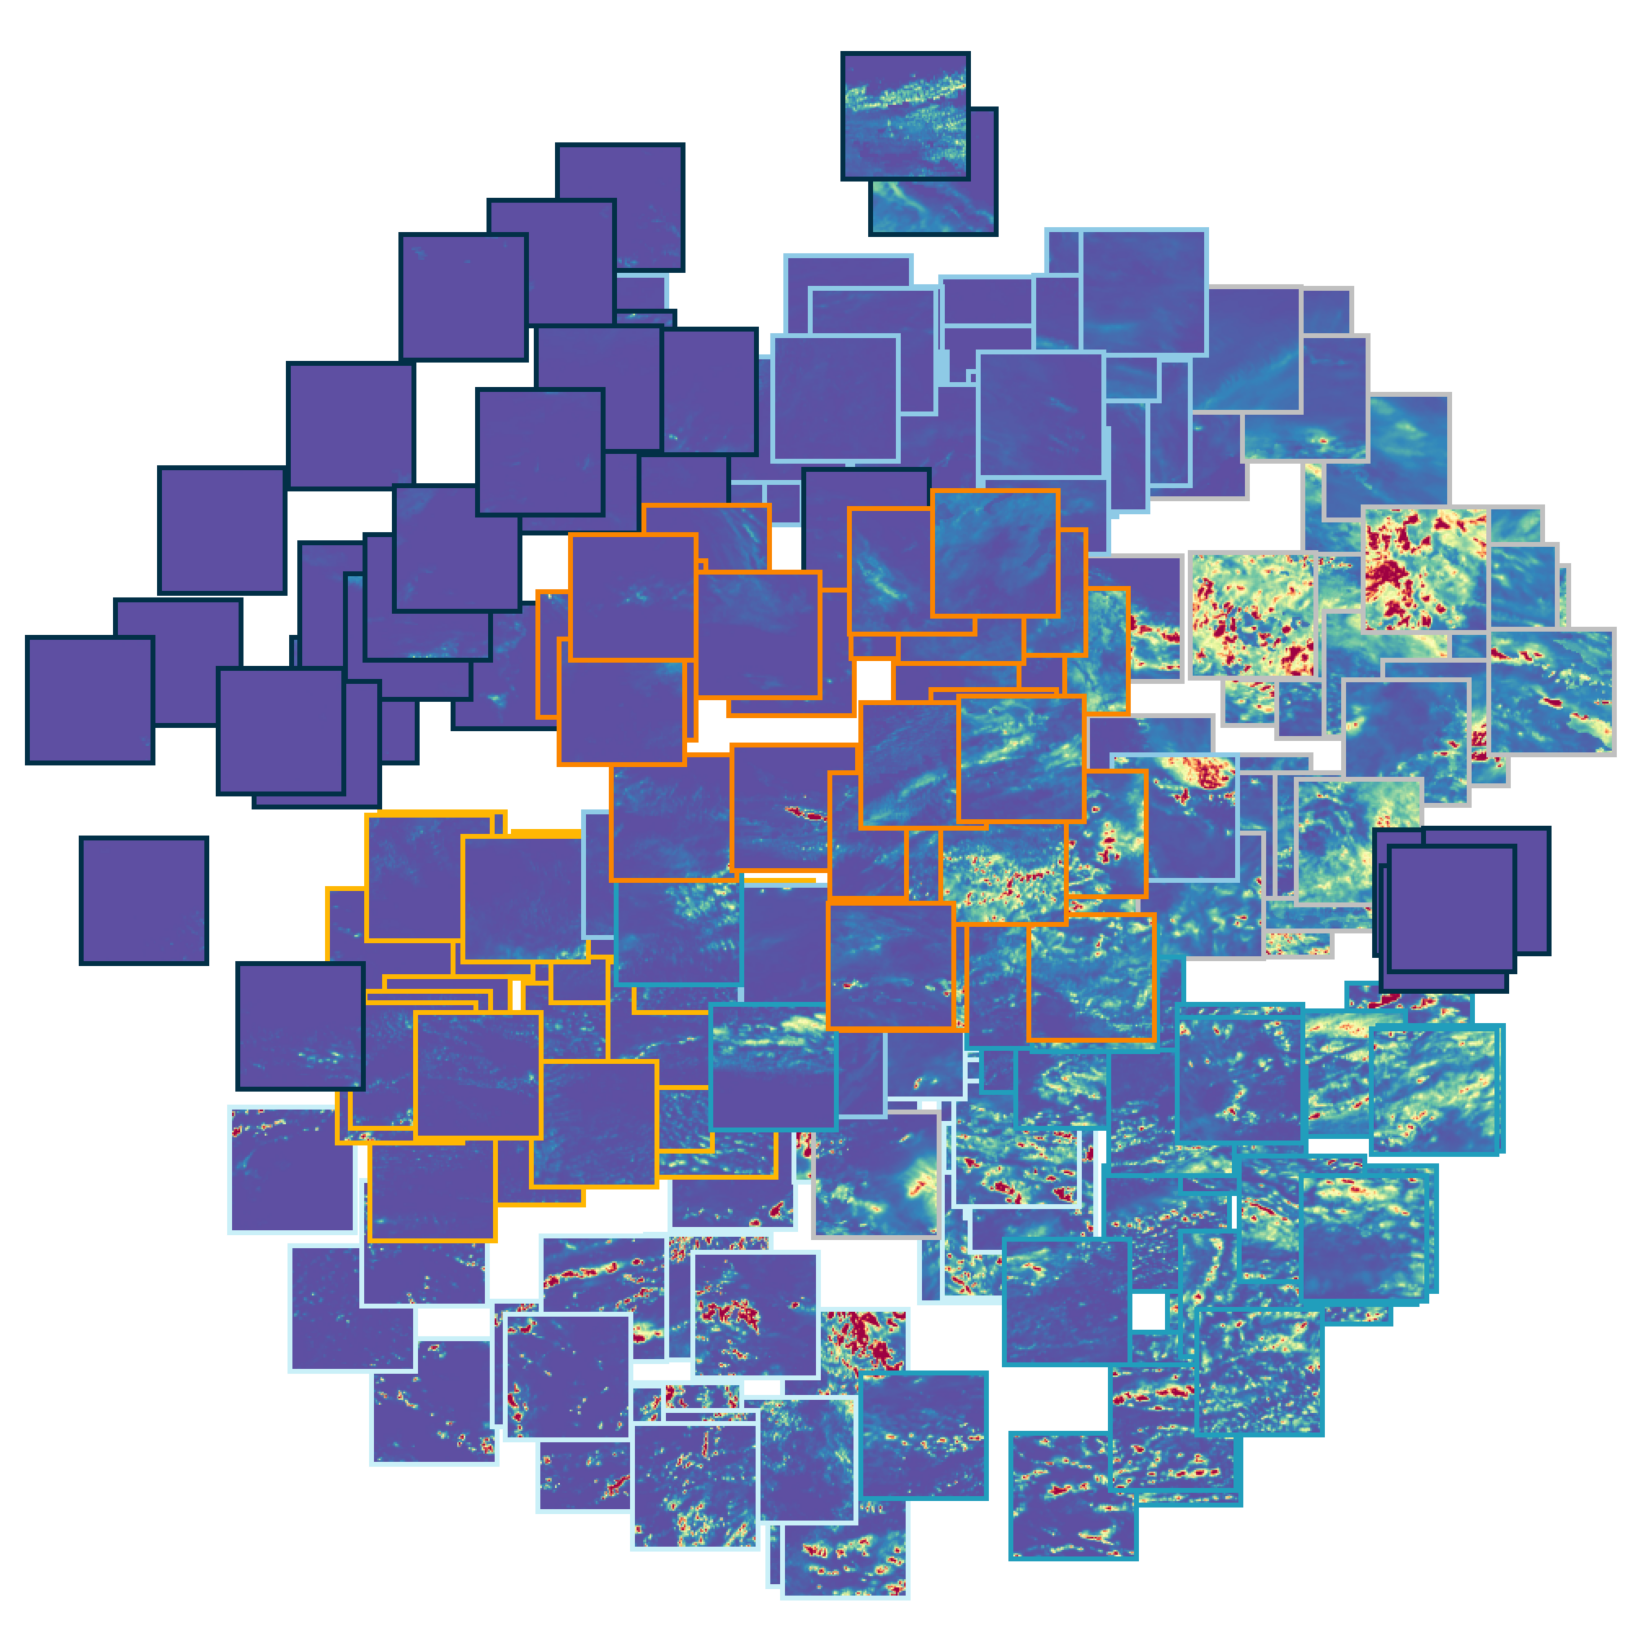

In [27]:
n1=30
a1=df_subset2.query("y == 0").sample(n=n1)
a2=df_subset2.query("y == 1").sample(n=n1)
a3=df_subset2.query("y == 2").sample(n=n1)
a4=df_subset2.query("y == 3").sample(n=n1)
a5=df_subset2.query("y == 4").sample(n=n1)
a6=df_subset2.query("y == 5").sample(n=n1)
a7=df_subset2.query("y == 6").sample(n=n1)
#a1=df_subset2.query("y == 5").sample(n=10)
#a1=df_subset2.query("y == 5").sample(n=10)
#a1=df_subset2.query("y == 5").sample(n=10)


result = [a1,a2,a3,a4,a5,a6,a7]
df = pd.concat(result)
tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)
fig = plt.figure(figsize=(36,30))
for index in range(len(df)):
    image_path = df.iloc[index,2]
    label = df.iloc[index,4]
    y=df.iloc[index,1]
    x=df.iloc[index,0]
    image = cv2.imread(image_path)
    image = scale_image(image, max_image_size)
    image = draw_rectangle_by_class(image, str(label))
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(image, x, y, image_centers_area_size, offset)
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = image
plt.imshow(tsne_plot[:, :, ::-1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [28]:
df

tsne-dcv22d-one  tsne-dcv22d-two  \
150743         0.147595         0.267678   
491388         0.631715         0.306199   
249120         0.620417         0.299845   
425937         0.441064         0.269705   
501953         0.241385         0.113452   
...                 ...              ...   
134746         0.367279         0.580335   
263853         0.592432         0.647752   
43566          0.374347         0.648962   
409995         0.560088         0.666908   
379479         0.615406         0.679282   

                                                 location  y  label  
150743  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0  
491388  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0  
249120  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0  
425937  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0  
501953  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0  
...                                                   ... ..    ...  
134746  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  6      6  
263853  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  6      6  
43566   /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  6      6  
409995  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  6      6  
379479  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  6      6  

[210 rows x 5 columns]

In [29]:
fig.savefig('/p/project/deepacf/kiste/DC/dataset/germany_all_2013/tsne_germany128_k7_oct.png',transparent=False,dpi=80,bbox_inches='tight')

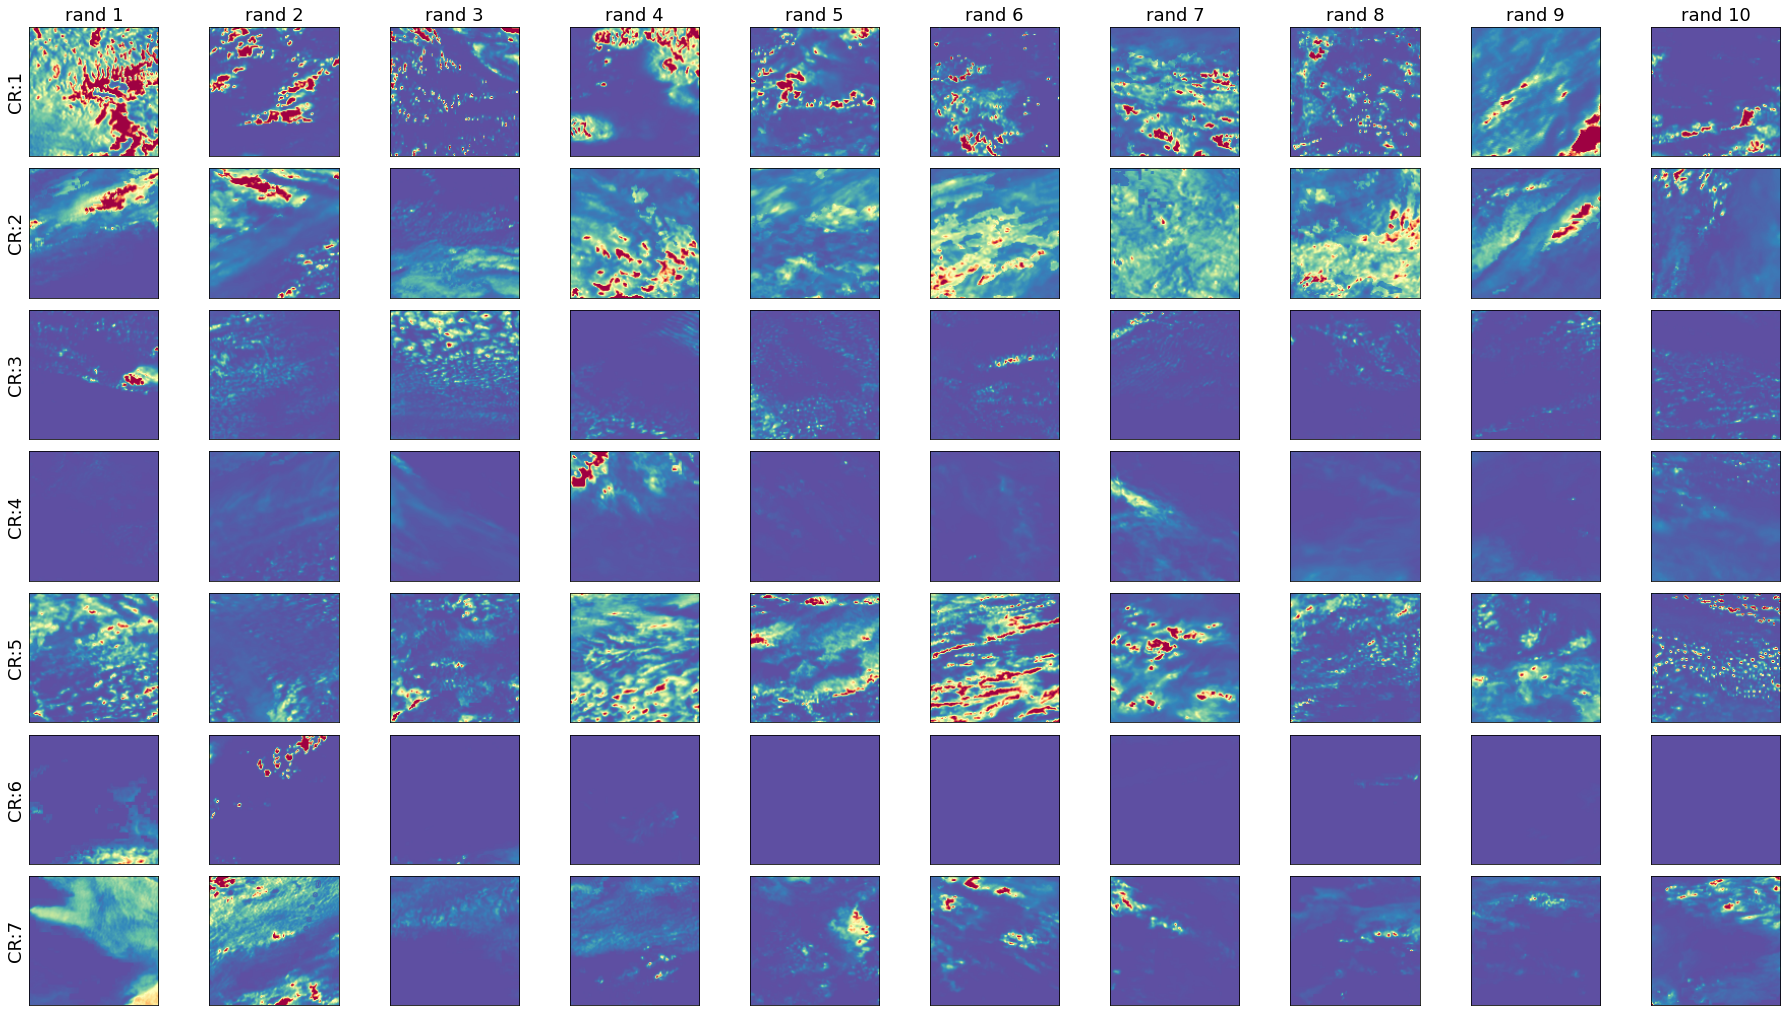

In [30]:
n1=10
a1=df_subset2.query("label == 0").sample(n=n1)
a2=df_subset2.query("label == 1").sample(n=n1)
a3=df_subset2.query("label == 2").sample(n=n1)
a4=df_subset2.query("label == 3").sample(n=n1)
a5=df_subset2.query("label == 4").sample(n=n1)
a6=df_subset2.query("label == 5").sample(n=n1)
a7=df_subset2.query("label == 6").sample(n=n1)

a1_loc = a1['location'].tolist()
a2_loc = a2['location'].tolist()
a3_loc = a3['location'].tolist()
a4_loc = a4['location'].tolist()
a5_loc = a5['location'].tolist()
a6_loc = a6['location'].tolist()
a7_loc = a7['location'].tolist()

result = [a1_loc,a2_loc,a3_loc,a4_loc,a5_loc,a6_loc,a7_loc] #,a7_loc

ftick=18

fig = plt.figure(figsize=(10.5, 10.5),constrained_layout=True)
gs0 = fig.add_gridspec(1, 1)

gs00 = gs0[0].subgridspec(7, n1)


pattern = result

pattern = np.array(pattern)
pattern = np.reshape(pattern,[7,n1])

for a in range(7):
    for b in range(n1):
        ax = fig.add_subplot(gs00[a, b])
        file = str(pattern[a,b])
        file = file[0:len(file)]
        image = plt.imread(file)
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        if a == 0 and b == 0:
            ax.set_ylabel('CR:1',fontsize=ftick)
            ax.set_title('rand 1',fontsize=ftick)
        if a == 1 and b == 0:
            ax.set_ylabel('CR:2',fontsize=ftick)
        if a == 2 and b == 0:
            ax.set_ylabel('CR:3',fontsize=ftick)
        if a == 3 and b == 0:
            ax.set_ylabel('CR:4',fontsize=ftick)
        if a == 4 and b == 0:
            ax.set_ylabel('CR:5',fontsize=ftick)
        if a == 5 and b == 0:
            ax.set_ylabel('CR:6',fontsize=ftick)
        if a == 6 and b == 0:
            ax.set_ylabel('CR:7',fontsize=ftick)
        if a == 0 and b == 1:
            ax.set_title('rand 2',fontsize=ftick)
        if a == 0 and b == 2:
            ax.set_title('rand 3',fontsize=ftick)
        if a == 0 and b == 3:
            ax.set_title('rand 4',fontsize=ftick)
        if a == 0 and b == 4:
            ax.set_title('rand 5',fontsize=ftick)
        if a == 0 and b == 5:
            ax.set_title('rand 6',fontsize=ftick)
        if a == 0 and b == 6:
            ax.set_title('rand 7',fontsize=ftick)
        if a == 0 and b == 7:
            ax.set_title('rand 8',fontsize=ftick)
        if a == 0 and b == 8:
            ax.set_title('rand 9',fontsize=ftick)
        if a == 0 and b == 9:
            ax.set_title('rand 10',fontsize=ftick)
        if a == 0 and b == 10:
            ax.set_title('rand 11',fontsize=ftick)
        if a == 0 and b ==11:
            ax.set_title('rand 12',fontsize=ftick)
        if a == 0 and b == 12:
            ax.set_title('rand 13',fontsize=ftick)
        if a == 0 and b == 13:
            ax.set_title('rand 14',fontsize=ftick)
        if a == 0 and b == 14:
            ax.set_title('rand 15',fontsize=ftick)
        if a == 0 and b == 15:
            ax.set_title('rand 16',fontsize=ftick)
        if a == 0 and b == 16:
            ax.set_title('rand 17',fontsize=ftick)
        if a == 0 and b == 17:
            ax.set_title('rand 18',fontsize=ftick)
        if a == 0 and b == 18:
            ax.set_title('rand 19',fontsize=ftick)
        if a == 0 and b == 19:
            ax.set_title('rand 20',fontsize=ftick)

fig.set_figheight(14)
fig.set_figwidth(25)

### continuous model

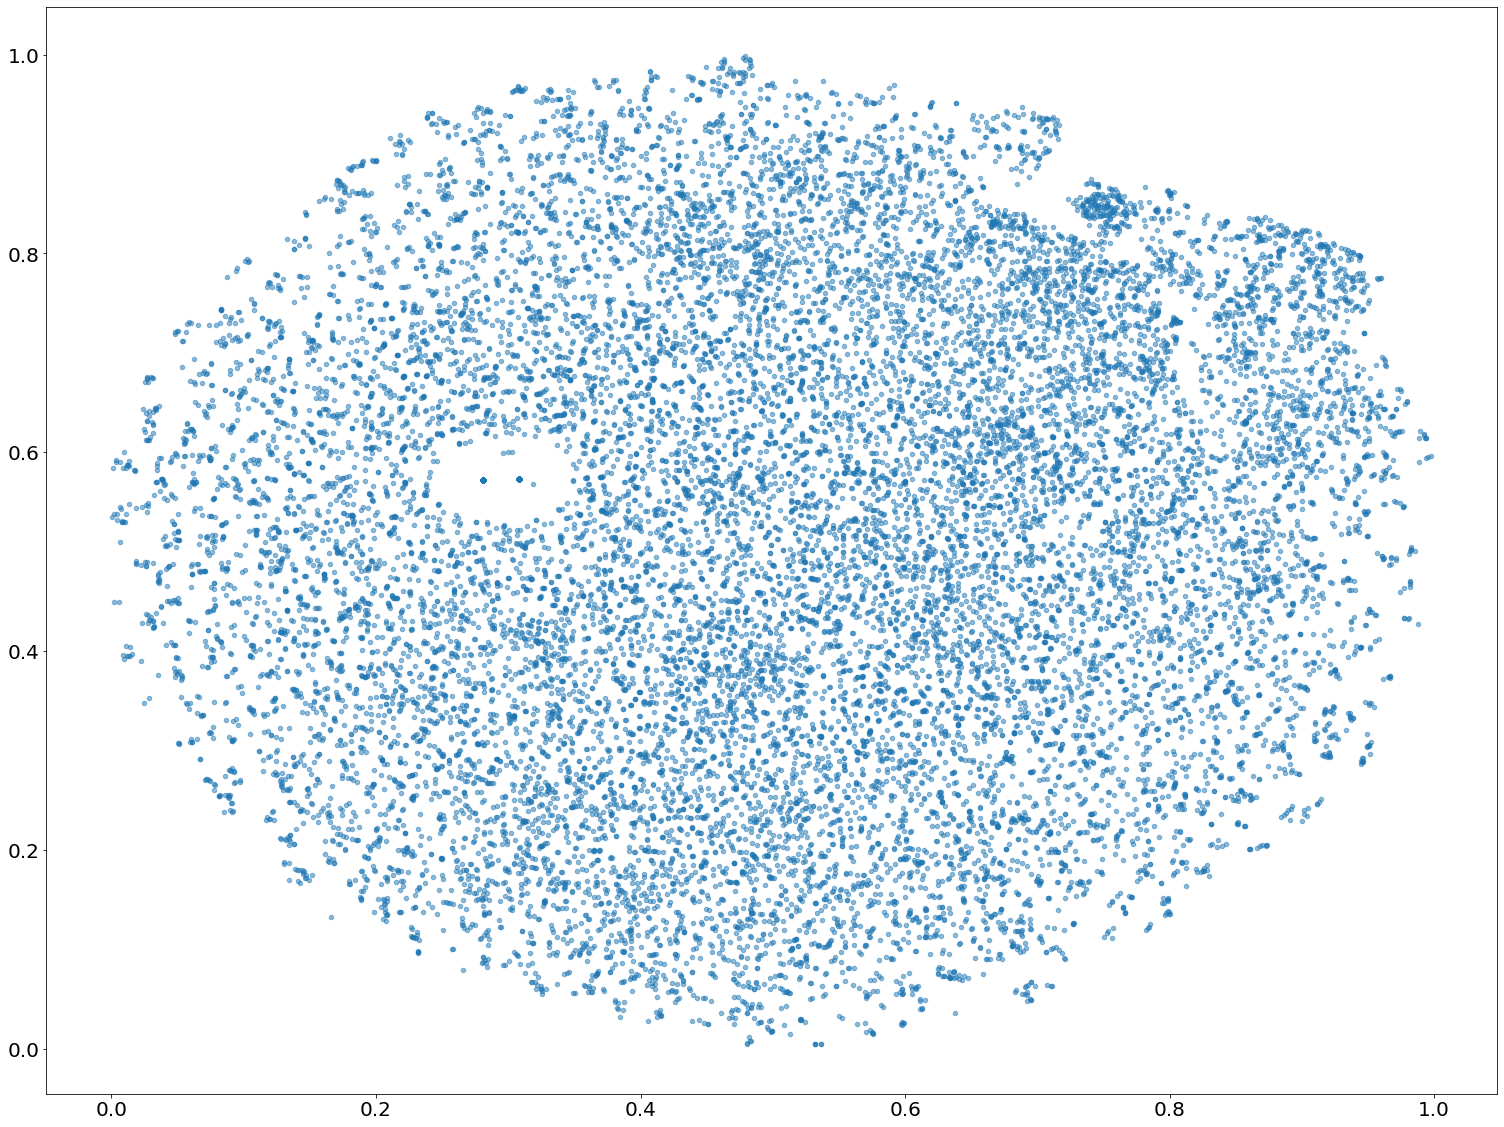

In [31]:
tsne_ = np.load('/p/project/deepacf/kiste/DC/august_germany/dino/training_2x96_128_germany/features/tsne_dinopcacosine_germany.npy')

tx = tsne_[:, 0]
ty = tsne_[:, 1]

def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

tsne_.shape

#df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tx
df_subset['tsne-2d-two'] = ty

df_subset1 = df_subset.sample(n = 20000)

fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111)

plt.scatter(df_subset1['tsne-2d-one'],df_subset1['tsne-2d-two'],alpha=0.5,s=20)
ax.tick_params(axis='both', which='major', labelsize=20)

In [32]:
df_subset1 = df_subset[df_subset.label != -100]
labels = df_subset['label']
n=1000
df_subset2 = df_subset1.sample(n=n)
df_subset2

tsne-dcv22d-one  tsne-dcv22d-two  \
560779         0.590926         0.206077   
259327         0.957984         0.603485   
521119         0.264941         0.733994   
15051          0.039823         0.400270   
113589         0.784457         0.328433   
...                 ...              ...   
450265         0.260602         0.136491   
129770         0.511849         0.346298   
280515         0.784556         0.525162   
360170         0.028992         0.564748   
631889         0.572592         0.152992   

                                                 location  y  label  \
560779  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0   
259327  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  1      1   
521119  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  5      5   
15051   /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  5      5   
113589  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  4      4   
...                                                   ... ..    ...   
450265  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0   
129770  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0   
280515  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  1      1   
360170  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  5      5   
631889  /p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...  0      0   

        tsne-2d-one  tsne-2d-two  
560779     0.348299     0.056093  
259327     0.518013     0.142194  
521119     0.889987     0.633079  
15051      0.632410     0.732860  
113589     0.421731     0.433870  
...             ...          ...  
450265     0.452845     0.768268  
129770     0.670193     0.284999  
280515     0.467992     0.297345  
360170     0.762378     0.786529  
631889     0.398507     0.163626  

[1000 rows x 7 columns]

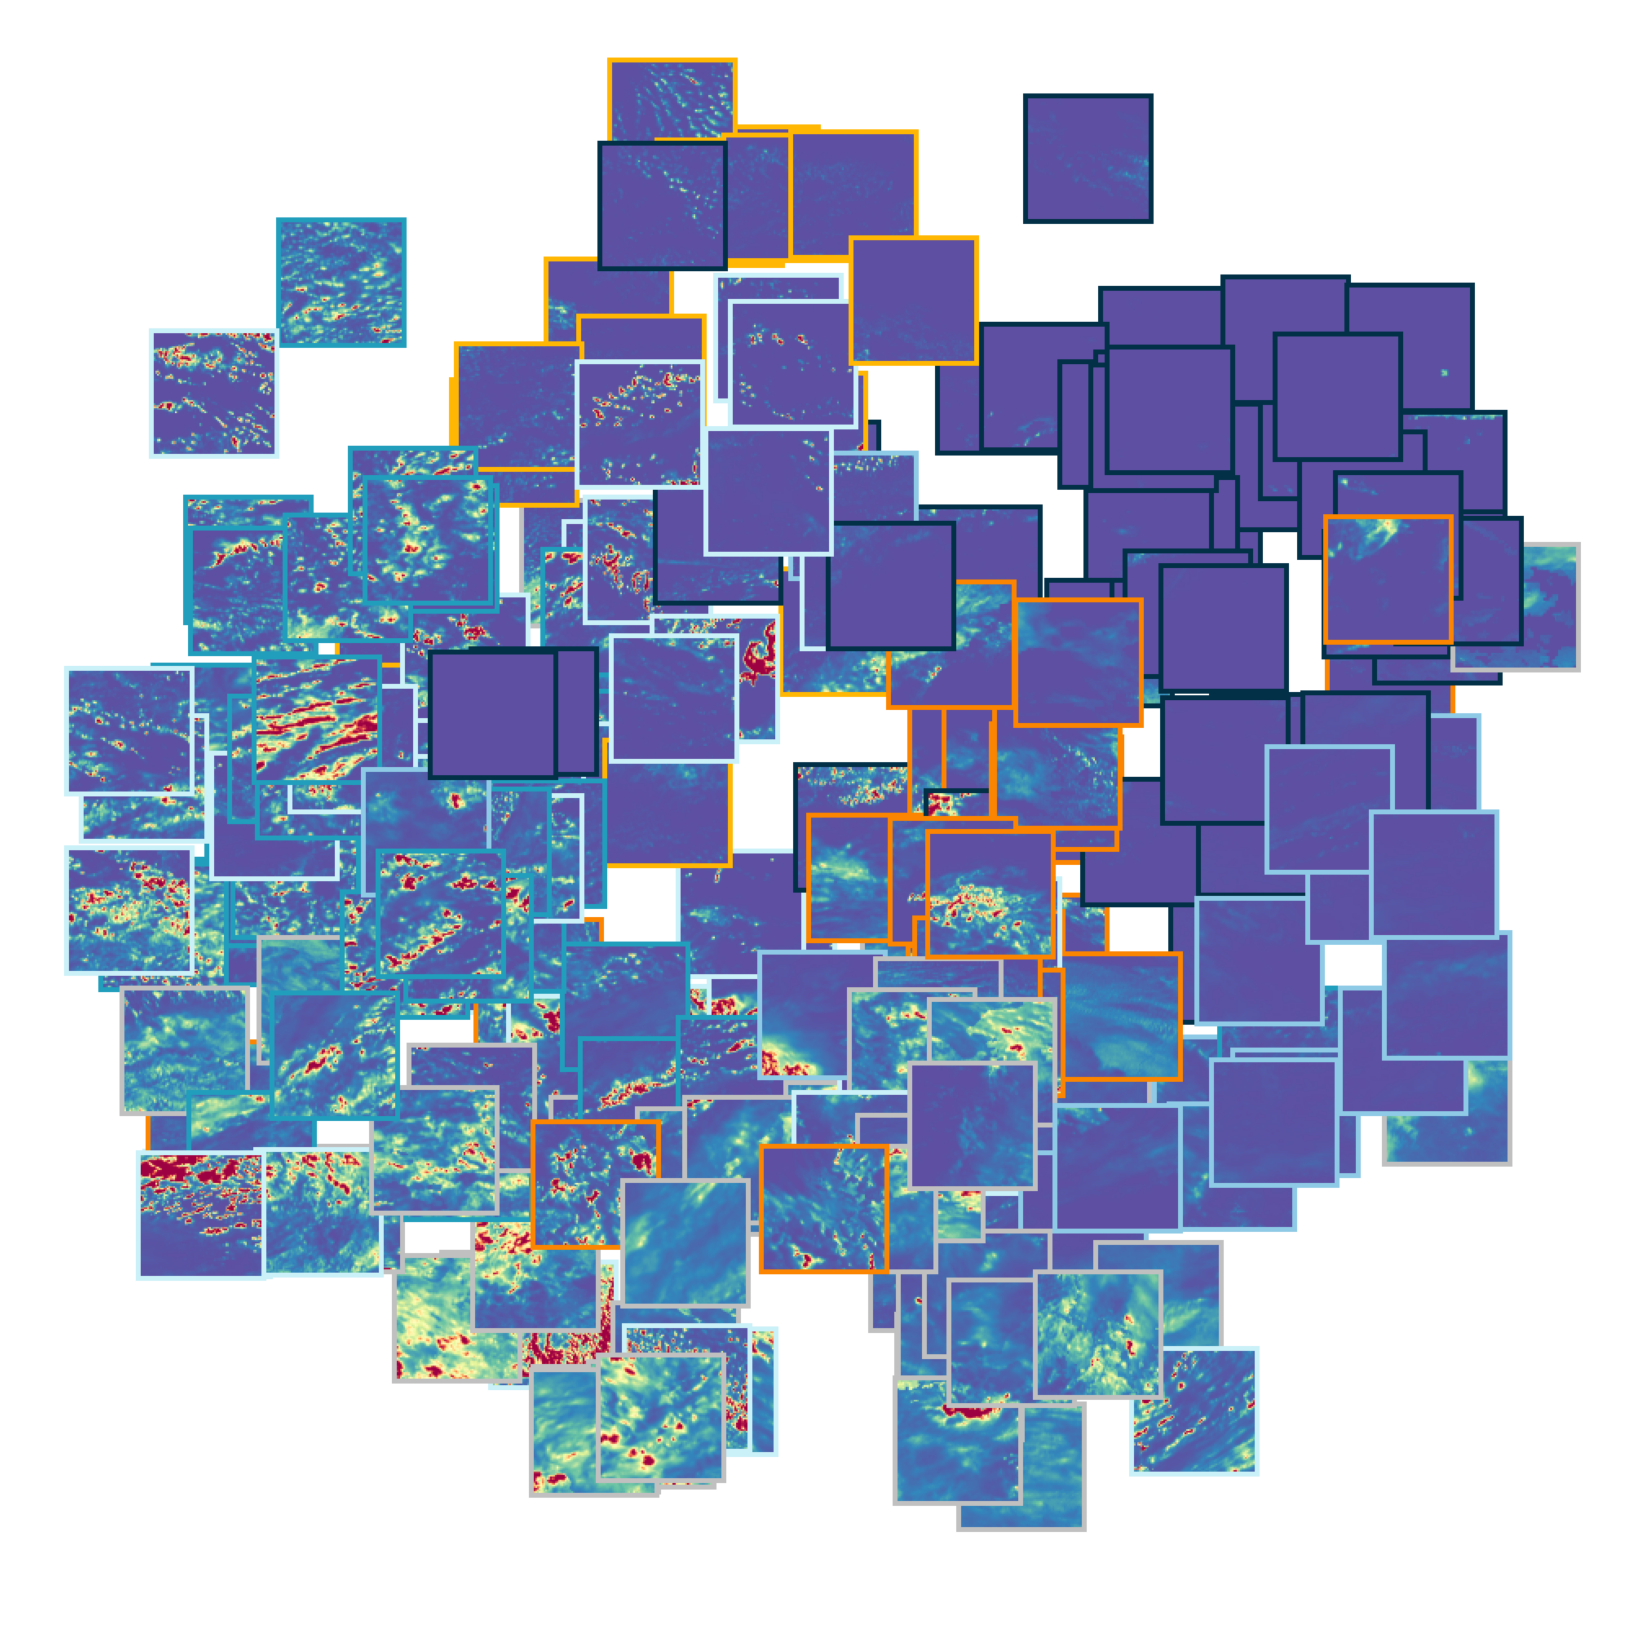

In [35]:
n=210
df_subset2 = df_subset1.sample(n=n)
plot_size=1000
max_image_size=80
offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset
fig = plt.figure(figsize=(36,30))
tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)
for index in range(len(df_subset2)):
    image_path = df_subset2.iloc[index,2]
    label = str(df_subset2.iloc[index,3])
    y=df_subset2.iloc[index,6]
    x=df_subset2.iloc[index,5]
    image = cv2.imread(image_path)
    image = scale_image(image, max_image_size)
    image = draw_rectangle_by_class(image, label)
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(image, x, y, image_centers_area_size, offset)
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = image
plt.imshow(tsne_plot[:, :, ::-1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [36]:
fig.savefig('/p/project/deepacf/kiste/DC/dataset/germany_all_2013/tsne_germany128_cont_oct.png',transparent=False,dpi=80,bbox_inches='tight')

In [37]:
df_subset.to_csv('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/tsne_k7_g128.csv', index=False)